[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


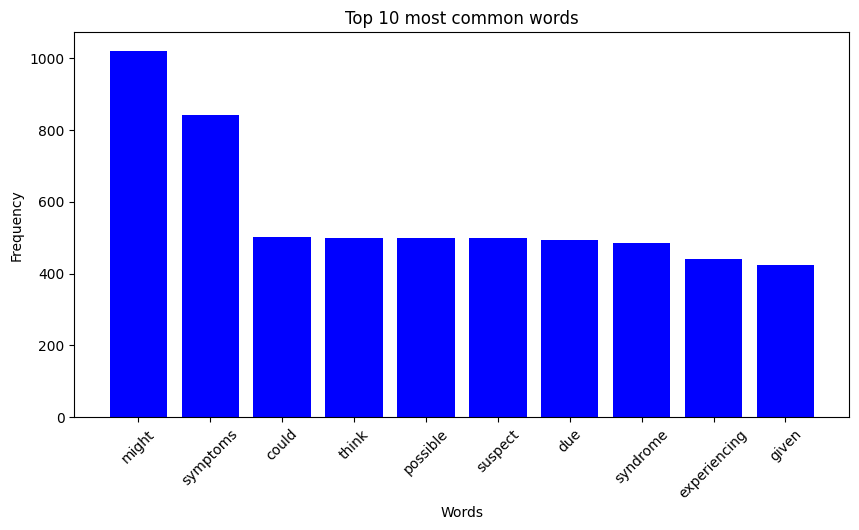

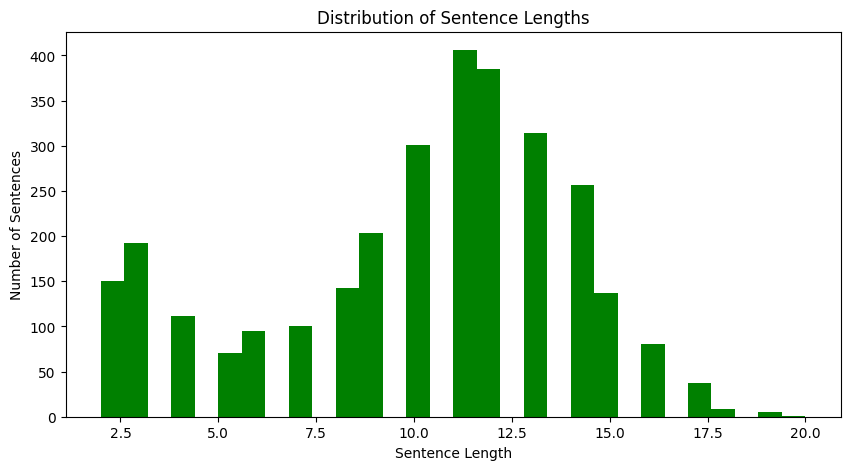

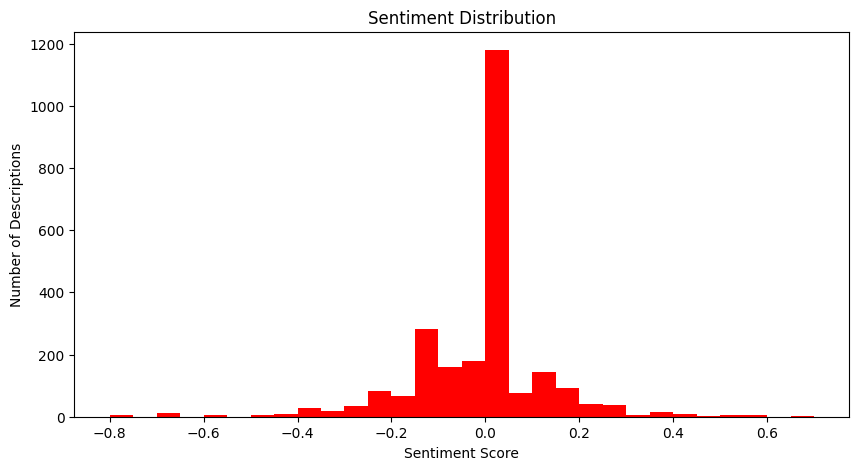

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def load_data(filepath):
    # Load your dataset from a text file
    with open(filepath, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())

    # Remove stopwords and specific words like "doctor"
    stop_words = set(stopwords.words('english'))
    stop_words.update(['doctor'])  # Add 'doctor' to stopwords list
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

def analyze_texts(descriptions):
    all_tokens = []
    sentence_lengths = []
    sentiments = []

    for description in descriptions:
        tokens = preprocess_text(description)
        all_tokens.extend(tokens)
        sentences = sent_tokenize(description)
        sentence_lengths.extend([len(preprocess_text(sentence)) for sentence in sentences])

        # Sentiment analysis using TextBlob
        blob = TextBlob(description)
        sentiments.append(blob.sentiment.polarity)

    # Compute stats
    word_counts = Counter(all_tokens)
    most_common_words = word_counts.most_common(10)
    unique_words = len(set(all_tokens))
    average_word_length = sum(map(len, all_tokens)) / len(all_tokens)
    average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

    # Identify bigrams and trigrams
    bigram_finder = BigramCollocationFinder.from_words(all_tokens)
    trigram_finder = TrigramCollocationFinder.from_words(all_tokens)
    top_bigrams = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
    top_trigrams = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10)

    # Sentiment analysis results
    average_sentiment = sum(sentiments) / len(sentiments)

    stats = {
        "word_counts": word_counts,
        "most_common_words": most_common_words,
        "unique_words": unique_words,
        "average_word_length": average_word_length,
        "sentence_lengths": sentence_lengths,
        "average_sentence_length": average_sentence_length,
        "top_bigrams": top_bigrams,
        "top_trigrams": top_trigrams,
        "sentiments": sentiments,
        "average_sentiment": average_sentiment
    }

    return stats

def plot_stats(stats):
    # Plotting the most common words
    words, frequencies = zip(*stats['most_common_words'])
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 most common words')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting sentence length distribution
    plt.figure(figsize=(10, 5))
    plt.hist(stats['sentence_lengths'], bins=30, color='green')
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    plt.show()

    # Plotting sentiment analysis results
    plt.figure(figsize=(10, 5))
    plt.hist(stats['sentiments'], bins=30, color='red')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Descriptions')
    plt.show()

def main():
    filepath = '/content/Trimmed_Filtered_Disease_script.txt'
    data = load_data(filepath)

    stats = analyze_texts(data)
    plot_stats(stats)

if __name__ == '__main__':
    main()
